<Figure size 1200x600 with 0 Axes>

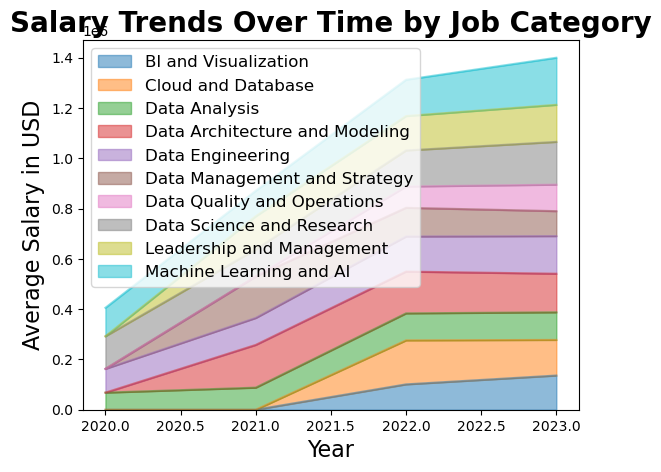

<Figure size 1200x600 with 0 Axes>

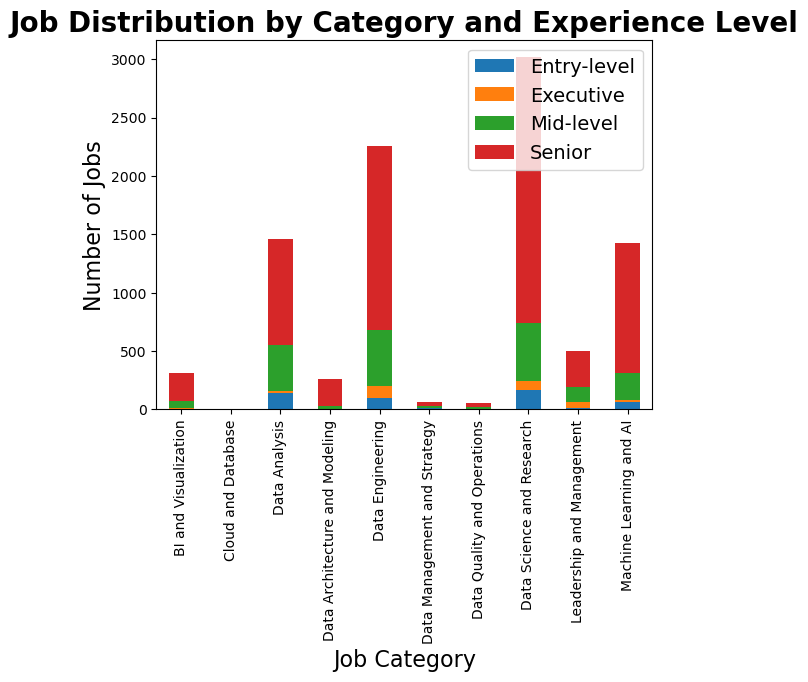

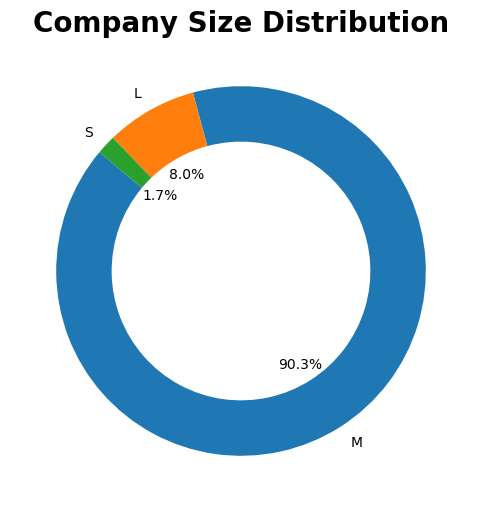

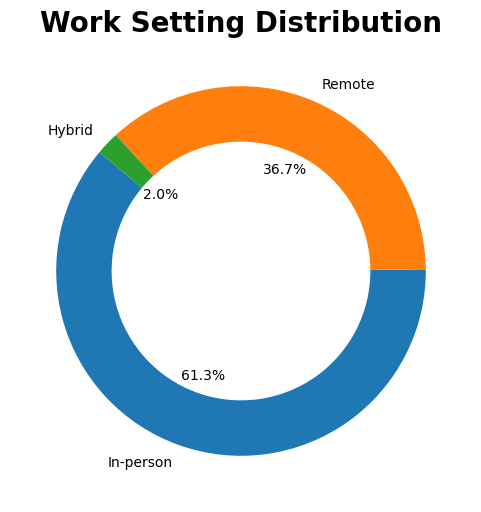

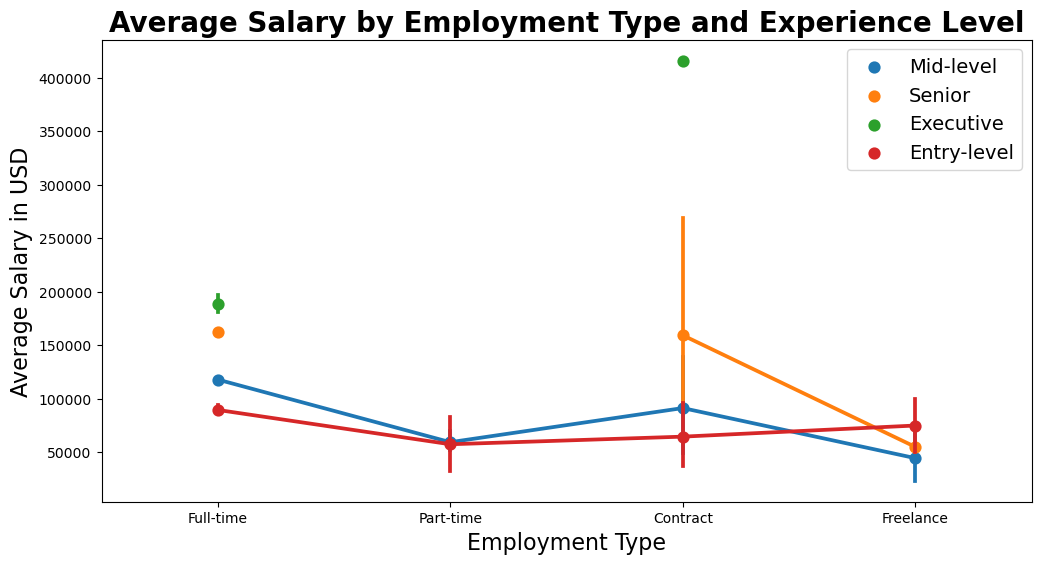

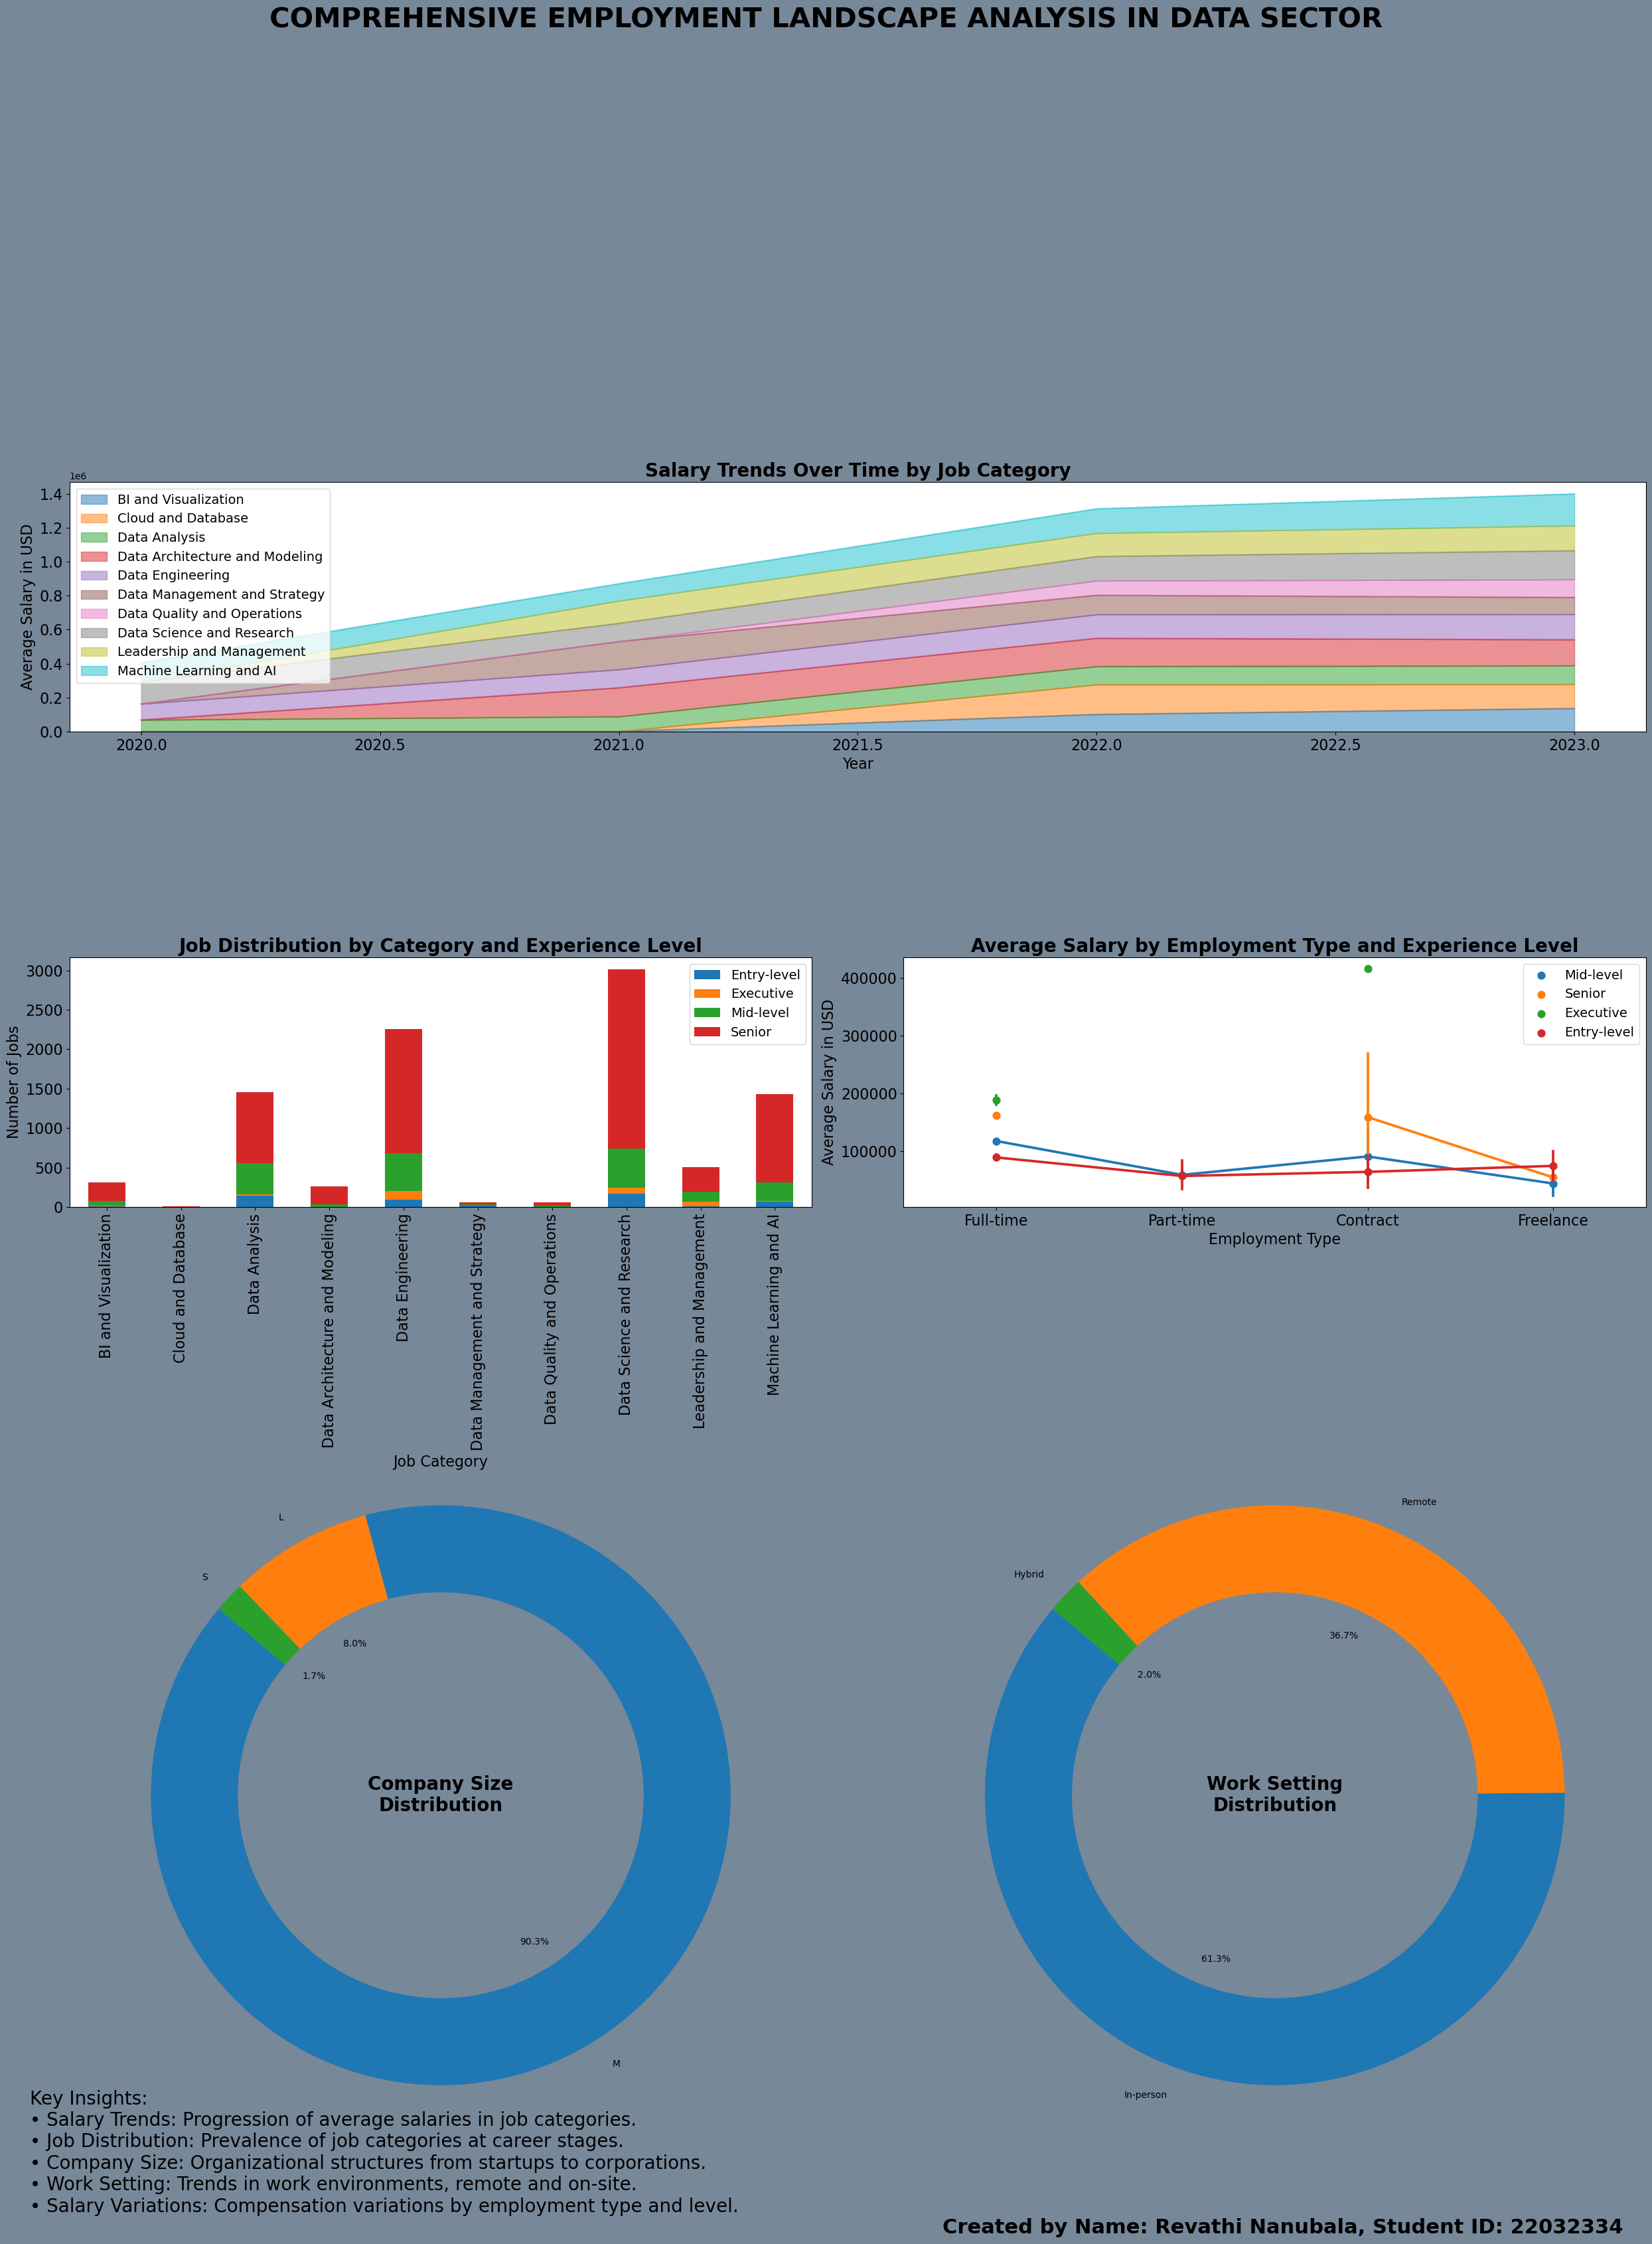

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 10 13:22:33 2024
@author: Revathi Nanubala
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load and clean the data
df = pd.read_csv('jobs_in_data.csv')
df = df.dropna()

# Define common font sizes
title_fontsize = 20
label_fontsize = 16
legend_fontsize = 14

# Function to create and save individual plots
def create_individual_plots():
    # Visualization 1: Area Plot for Salary Trends Over Time
    plt.figure(figsize=(12, 6))
    df_trend = df.groupby(['work_year', 'job_category']).mean()['salary_in_usd'].unstack()
    df_trend.plot(kind='area', stacked=True, alpha=0.5)
    plt.title('Salary Trends Over Time by Job Category', fontsize=title_fontsize, weight='bold')
    plt.xlabel('Year', fontsize=label_fontsize)
    plt.ylabel('Average Salary in USD', fontsize=label_fontsize)
    plt.legend(loc='upper left', fontsize=12)
    plt.savefig('salary_trends_over_time.png')
   
    # Visualization 2: Stacked Bar Chart for Job Distribution by Experience Level and Category
    plt.figure(figsize=(12, 6))
    df_experience = pd.crosstab(df['job_category'], df['experience_level'])
    df_experience.plot(kind='bar', stacked=True)
    plt.title('Job Distribution by Category and Experience Level', fontsize=title_fontsize, weight='bold')
    plt.xlabel('Job Category', fontsize=label_fontsize)
    plt.ylabel('Number of Jobs', fontsize=label_fontsize)
    plt.legend(loc='upper right', fontsize=legend_fontsize)
    plt.savefig('job_distribution_by_experience.png')
  

    # Visualization 3: Doughnut Charts for Company Size and Work Setting
    # Company Size
    plt.figure(figsize=(6, 6))
    company_size_counts = df['company_size'].value_counts()
    plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    plt.title('Company Size Distribution', fontsize=title_fontsize, weight='bold')
    plt.savefig('company_size_distribution.png')
  

    # Work Setting
    plt.figure(figsize=(6, 6))
    work_setting_counts = df['work_setting'].value_counts()
    plt.pie(work_setting_counts, labels=work_setting_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    plt.title('Work Setting Distribution', fontsize=title_fontsize, weight='bold')
    plt.savefig('work_setting_distribution.png')


    # Visualization 4: Point Plot of Average Salary by Employment Type and Experience Level
    plt.figure(figsize=(12, 6))
    sns.pointplot(x='employment_type', y='salary_in_usd', hue='experience_level', data=df)
    plt.title('Average Salary by Employment Type and Experience Level', fontsize=title_fontsize, weight='bold')
    plt.xlabel('Employment Type', fontsize=label_fontsize)
    plt.ylabel('Average Salary in USD', fontsize=label_fontsize)
    plt.legend(fontsize=legend_fontsize)
    plt.savefig('average_salary_by_employment_type.png')
   

# Create and save individual plots
create_individual_plots()

# Create a large figure for the dashboard
plt.figure(figsize=(25, 35), facecolor='lightslategrey')  
gs = GridSpec(5, 2, figure=plt.gcf())  

# Visualization 1: Area Plot for Salary Trends Over Time in Dashboard
ax0 = plt.subplot(gs[1, :])  # Span both columns of the first row
df_trend = df.groupby(['work_year', 'job_category']).mean()['salary_in_usd'].unstack()
df_trend.plot(kind='area', stacked=True, alpha=0.5, ax=ax0)
ax0.set_title('Salary Trends Over Time by Job Category', fontsize=title_fontsize, weight= 'bold')
ax0.set_xlabel('Year', fontsize=label_fontsize)
ax0.set_ylabel('Average Salary in USD', fontsize=label_fontsize)
ax0.tick_params(axis='both', labelsize=label_fontsize)
ax0.legend(loc='upper left', fontsize=legend_fontsize)

# Visualization 2: Stacked Bar Chart for Job Distribution by Experience Level and Category in Dashboard
ax1 = plt.subplot(gs[2, 0])  # Second row, first column
df_experience = pd.crosstab(df['job_category'], df['experience_level'])
df_experience.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Job Distribution by Category and Experience Level', fontsize=title_fontsize, weight= 'bold')
ax1.set_xlabel('Job Category', fontsize=label_fontsize)
ax1.set_ylabel('Number of Jobs', fontsize=label_fontsize)
ax1.tick_params(axis='both', labelsize=label_fontsize)
ax1.legend(loc='upper right', fontsize=legend_fontsize)

# Visualization 3: Doughnut Charts for Company Size and Work Setting in Dashboard

ax2 = plt.subplot(gs[3:5, 0])  # Second row, second column for Company Size Distribution
company_size_counts = df['company_size'].value_counts()
ax2.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
# Set title inside the doughnut
ax2.text(0, 0, 'Company Size\nDistribution', ha='center', va='center', fontsize=title_fontsize, weight='bold', color='black')

ax3 = plt.subplot(gs[3:5, 1])  # Third row, second column for Work Setting Distribution
work_setting_counts = df['work_setting'].value_counts()
ax3.pie(work_setting_counts, labels=work_setting_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
# Set title inside the doughnut
ax3.text(0, 0, 'Work Setting\nDistribution', ha='center', va='center', fontsize=title_fontsize, weight='bold', color='black')

# Visualization 4: Point Plot of Average Salary by Employment Type and Experience Level in Dashboard
ax4 = plt.subplot(gs[2, 1])  # Third row, first column
sns.pointplot(x='employment_type', y='salary_in_usd', hue='experience_level', data=df, ax=ax4)
ax4.set_title('Average Salary by Employment Type and Experience Level', fontsize=title_fontsize, weight= 'bold')
ax4.set_xlabel('Employment Type', fontsize=label_fontsize)
ax4.set_ylabel('Average Salary in USD', fontsize=label_fontsize)
ax4.tick_params(axis='both', labelsize=label_fontsize)
ax4.legend(fontsize=legend_fontsize)

# Adding title, description, and student information
plt.suptitle('COMPREHENSIVE EMPLOYMENT LANDSCAPE ANALYSIS IN DATA SECTOR', fontsize=30, fontweight='bold', color='black')
plt.figtext(0.98, 0.02, 'Created by Name: Revathi Nanubala, Student ID: 22032334', ha='right', fontsize=22, va='bottom', weight= 'bold')
# Add insights as labels
insights_text = """
Key Insights:
• Salary Trends: Progression of average salaries in job categories.
• Job Distribution: Prevalence of job categories at career stages.
• Company Size: Organizational structures from startups to corporations.
• Work Setting: Trends in work environments, remote and on-site.
• Salary Variations: Compensation variations by employment type and level.
"""
plt.figtext(0.02, 0.02, insights_text, ha='left', fontsize=20, va='bottom', wrap=True)
plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()
